## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

%matplotlib inline

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
# Gather variables about the data for later analysis.
n = len(df)
mu = np.round(df.temperature.mean(),6)
sigma = np.round(df.temperature.std(),6)
sterr = np.round(sigma / np.sqrt(n),6)

print('Sample size: {0} \nMean: {1} \nStandard deviation: {2} \nStandard Error {3}'.format(n, mu, sigma, sterr))

Sample size: 130 
Mean: 98.249231 
Standard deviation: 0.733183 
Standard Error 0.064304


### 1) Is the distribution of body temperatures normal?

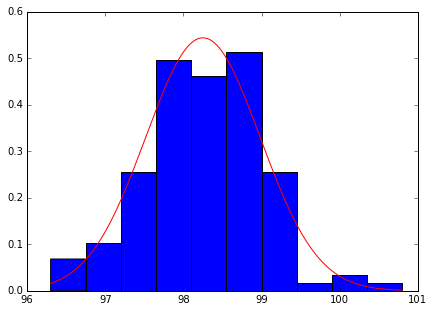

In [5]:
# Normalized line for comparison.
norm_line = np.linspace(df.temperature.min(), df.temperature.max(), n)

plt.figure(figsize=(7,5))
plt.hist(df.temperature, normed=True)
plt.plot(norm_line, mlab.normpdf(norm_line, mu, sigma), color='r')

Visually, the data appears fairly normal.

In [6]:
x, p = stats.normaltest(df.temperature)
print('The p-value of the normaltest is {0}.'.format(np.round(p,6)))

The p-value of the normaltest is 0.258748.


The p-value of the normalcy test is greater than 0.05, verifying that **the distribution is normal.**

### 2) Is the true population mean really 98.6 degrees F?

In [7]:
# H0: The population mean is 98.6 degrees F.
# HA: The population mean is not 98.6 degrees F.
h0_mu = 98.6

# The sample size is above 30, so by rule of thumb we can apply the z-test.

# Calculate z-score assuming H0.
h0_z_score = (mu - h0_mu)/sterr

print('Z-score for H0: {0}'.format(np.round(h0_z_score,6)))

Z-score for H0: -5.454855


My calculations show that a sample mean of 98.2 is 5.454855 standard deviations from the $\sf{H_{0}}$ mean of 98.6. Given that 3 standard deviations would indicate a 0.3% chance, this makes the null hypothesis a statistical impossibility; therefore, **We reject the null hypothesis that the true population mean is 98.6 degrees F.**

### 3) At what temperature should we consider someone's temperature to be "abnormal"?

In [13]:
# We'll use a 95% confidence interval. According to the z-table, this gives us a z-score of 1.96
z_score = 1.96

upper_bound = mu + sigma * z_score
lower_bound = mu - sigma * z_score

print('Upper bound: {0} \nLower bound: {1}'.format(np.round(upper_bound,6), np.round(lower_bound,6)))

Upper bound: 99.68627 
Lower bound: 96.812192


Someone's temperature should be considered "abnormal" if it's **below 96.81** or **above 99.69.**

### 4) Is there a significant difference between males and females in normal temperature?

In [40]:
# Stats for analysis.
males = df[df.gender == 'M']
females = df[df.gender == 'F']

m_n = len(males)
m_mu = np.round(males.temperature.mean(),6)
m_sigma = np.round(males.temperature.std(),6)
print('\n:Males: \nSample size: {0} \nMean: {1} \nStandard deviation: {2}'.format(m_n, m_mu, m_sigma))

f_n = len(females)
f_mu = np.round(females.temperature.mean(),6)
f_sigma = np.round(females.temperature.std(),6)
print('\n:Females: \nSample size: {0} \nMean: {1} \nStandard deviation: {2}'.format(f_n, f_mu, f_sigma))


:Males: 
Sample size: 65 
Mean: 98.104615 
Standard deviation: 0.698756

:Females: 
Sample size: 65 
Mean: 98.393846 
Standard deviation: 0.743488


In [39]:
# H0: There is no difference between the mean temperature of males and females.
# H1: There is some difference between the mean temperature of males and females.

# We're using a 95% confidence interval here, so the z_score from earlier (1.96) is re-used.

diff_mu = abs(m_mu - f_mu)
diff_sigma = np.sqrt((m_sigma**2/m_n)+(f_sigma**2/f_n))
diff_err = z_score * diff_sigma

diff_h0 = 0
diff_h0_zscore = (diff_mu - diff_h0)/diff_err

print('The z-score for the difference in means is {0}.'.format(np.round(diff_h0_zscore,6)))

The z-score for the difference in means is 1.166039


Given that 1.166 corresponds to 37.7% on the z-table, it's possible these are sampling differences; therefore, **there's no significant difference between samples.**